## MIRA LLM equation extraction evaluation

This notebook benchmarks MIRA's LLM equation extraction functionality on a set of 10 compartmental models. The process involves:

**Equation Extraction**: We upload an image of a system of equations defining a model to a locally running instance of MIRA’s equation extraction UI. The extracted SymPy equation strings are then pasted into their respective cells in this notebook.

**Initial Template Model Generation**: We attempt to create a MIRA template model directly from the extracted equations. If this fails, we document any modifications needed to make the system of equations valid for MIRA.

**Correctness Evaluation**: After successfully generating a MIRA template model, we assess whether it correctly represents the original compartmental model. Any necessary corrections are noted to ensure veracity are noted.

**Comparing Extracted vs. Correct Models**: If errors in the extracted equations lead to structural differences between the initial model and the correct model, we create MIRA template models for both versions and print out their model structures for comparison purposes. We also group correctness edits into smaller ones that don't affect model structure and structural ones that do affect the dynamics of the model. 


The equation extraction process isn't deterministic and different ODE strings can be generated from the same image of ODE equations.

In [294]:
from mira.openai import OpenAIClient
from mira.sources.sympy_ode.llm_util import (
    execute_template_model_from_sympy_odes,
    image_file_to_odes_str,
)
from IPython.display import Image

client = OpenAIClient()

In [295]:
# BIOMODEL 955

# Executes straight out the box.

# Smaller correction edits
# 1. Defines two lambda parameters


original_ode_str_biomd_955 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, I, D, A, R, T, H, E = sympy.symbols("S I D A R T H E", cls=sympy.Function)

# Define the parameters
alpha, beta, gamma, delta, epsilon, zeta, lambda_, eta, rho, theta, mu, nu, xi, sigma, tau, kappa, lambda_ = sympy.symbols("alpha beta gamma delta epsilon zeta lambda eta rho theta mu nu xi sigma tau kappa lambda_")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta * R(t))),
    sympy.Eq(I(t).diff(t), S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta * R(t)) - (epsilon + zeta + lambda_) * I(t)),
    sympy.Eq(D(t).diff(t), epsilon * I(t) - (eta + rho) * D(t)),
    sympy.Eq(A(t).diff(t), zeta * I(t) - (theta + mu + kappa) * A(t)),
    sympy.Eq(R(t).diff(t), eta * D(t) + theta * A(t) - (nu + xi) * R(t)),
    sympy.Eq(T(t).diff(t), mu * A(t) + nu * R(t) - (sigma + tau) * T(t)),
    sympy.Eq(H(t).diff(t), lambda_ * I(t) + rho * D(t) + kappa * A(t) + xi * R(t) + sigma * T(t)),
    sympy.Eq(E(t).diff(t), tau * T(t))
]
"""


correct_ode_str_biomd_955 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, I, D, A, R, T, H, E = sympy.symbols("S I D A R T H E", cls=sympy.Function)

# Define the parameters
alpha, beta, gamma, delta, epsilon, zeta, lambda_, eta, rho, theta, mu, nu, xi, sigma, tau, kappa = sympy.symbols("alpha beta gamma delta epsilon zeta lambda eta rho theta mu nu xi sigma tau kappa")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta * R(t))),
    sympy.Eq(I(t).diff(t), S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta * R(t)) - (epsilon + zeta + lambda_) * I(t)),
    sympy.Eq(D(t).diff(t), epsilon * I(t) - (eta + rho) * D(t)),
    sympy.Eq(A(t).diff(t), zeta * I(t) - (theta + mu + kappa) * A(t)),
    sympy.Eq(R(t).diff(t), eta * D(t) + theta * A(t) - (nu + xi) * R(t)),
    sympy.Eq(T(t).diff(t), mu * A(t) + nu * R(t) - (sigma + tau) * T(t)),
    sympy.Eq(H(t).diff(t), lambda_ * I(t) + rho * D(t) + kappa * A(t) + xi * R(t) + sigma * T(t)),
    sympy.Eq(E(t).diff(t), tau * T(t))
]
"""

correct_tm_biomd_955 = execute_template_model_from_sympy_odes(
    ode_str=correct_ode_str_biomd_955, attempt_grounding=False, client=client
)

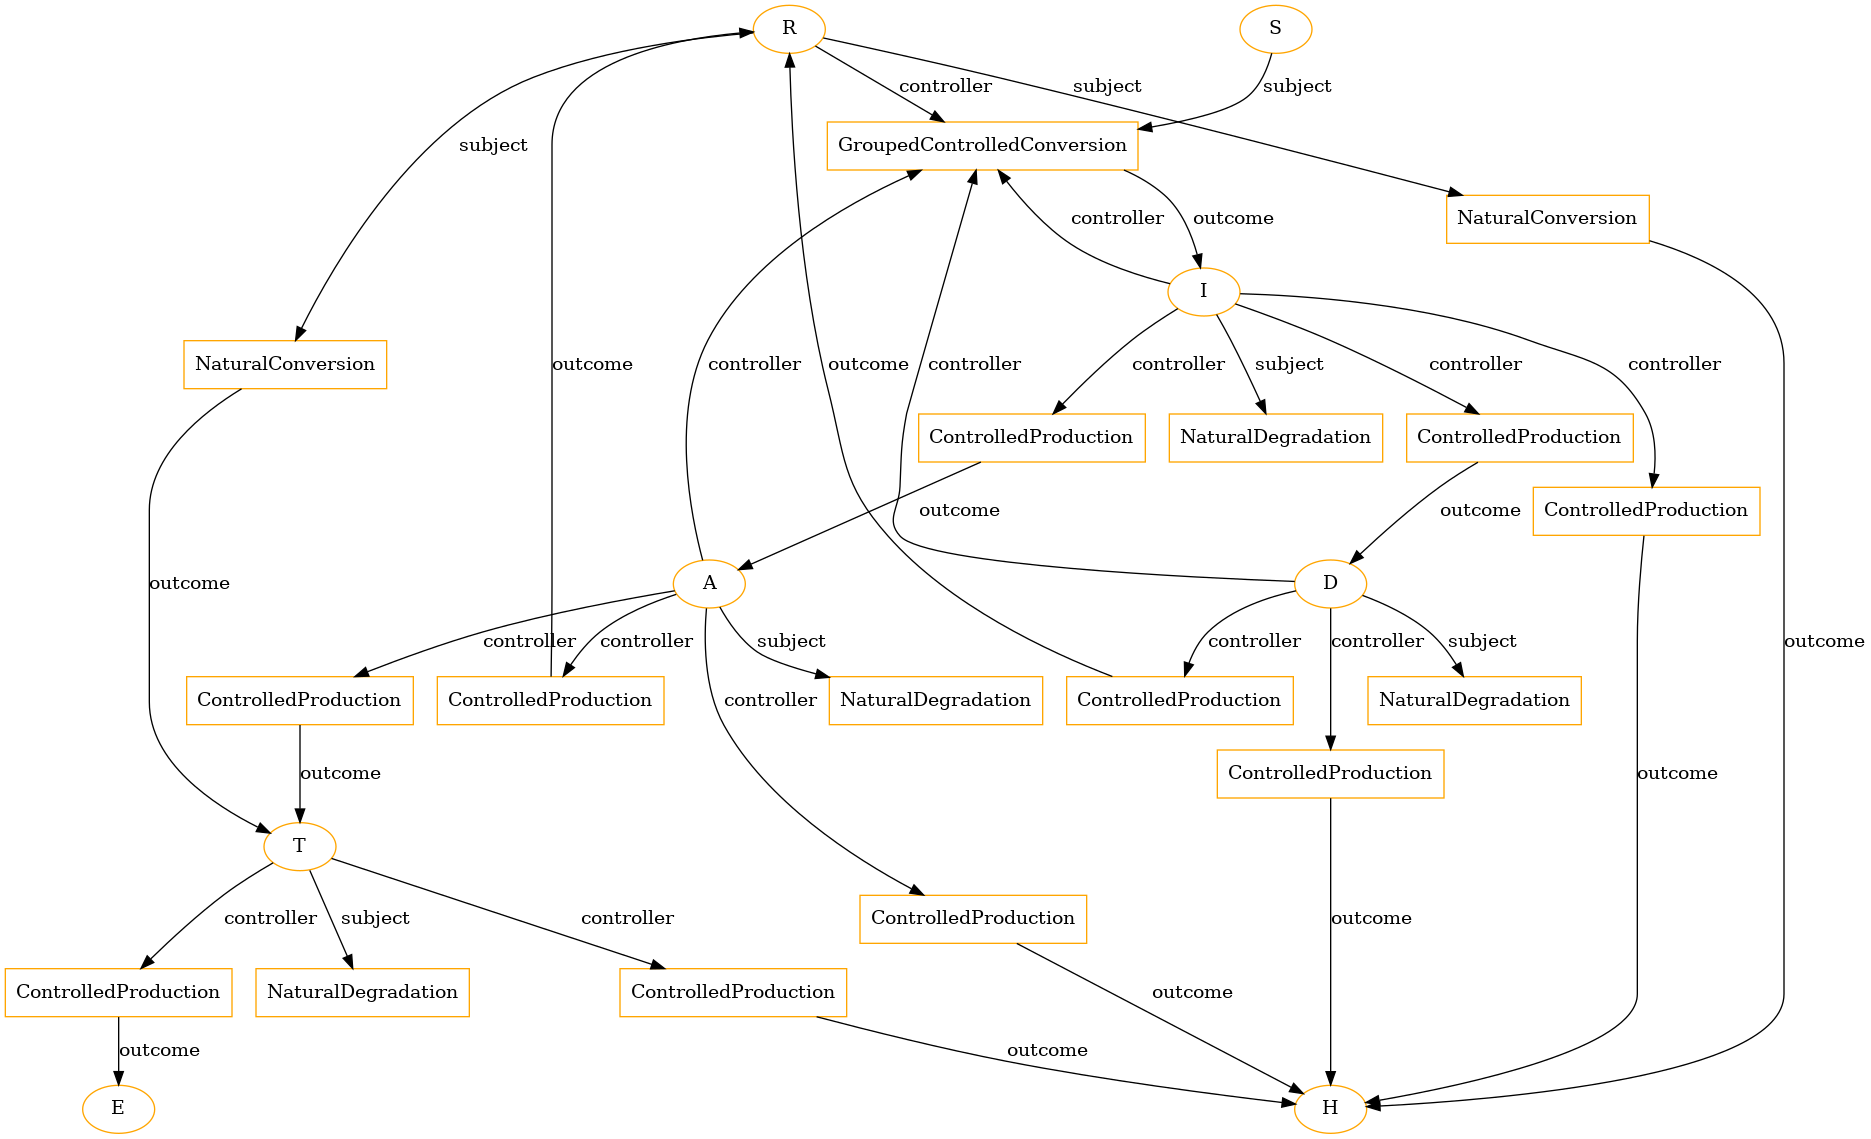

In [296]:
correct_tm_biomd_955.draw_jupyter()

In [297]:
# BIOMODEL 956

# Executes straight out the box

# Structural correction edits
# 1. Conflates the parameter N which represents population as a compartment. Remove N as a compartment and 
# add it as a parameter and update the system of equations appropriately.

original_ode_str_biomd_956 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R, N = sympy.symbols("S E I R N", cls=sympy.Function)

# Define the parameters
beta, gamma, alpha = sympy.symbols("beta gamma alpha")

odes = [
    sympy.Eq(S(t).diff(t), - beta * S(t) * I(t) / N(t)),
    sympy.Eq(E(t).diff(t), beta * S(t) * I(t) / N(t) - alpha * E(t)),
    sympy.Eq(I(t).diff(t), alpha * E(t) - gamma * I(t)),
    sympy.Eq(R(t).diff(t), gamma * I(t))
]
"""

error_free_tm_biomd_956 = execute_template_model_from_sympy_odes(
    ode_str=original_ode_str_biomd_956, attempt_grounding=False, client=client
)


correct_ode_str_biomd_956 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, gamma, alpha, N = sympy.symbols("beta gamma alpha N")

odes = [
    sympy.Eq(S(t).diff(t), - beta * S(t) * I(t) / N),
    sympy.Eq(E(t).diff(t), beta * S(t) * I(t) / N - alpha * E(t)),
    sympy.Eq(I(t).diff(t), alpha * E(t) - gamma * I(t)),
    sympy.Eq(R(t).diff(t), gamma * I(t))
]
"""


correct_tm_biomd_956 = execute_template_model_from_sympy_odes(
    ode_str=correct_ode_str_biomd_956, attempt_grounding=False, client=client
)

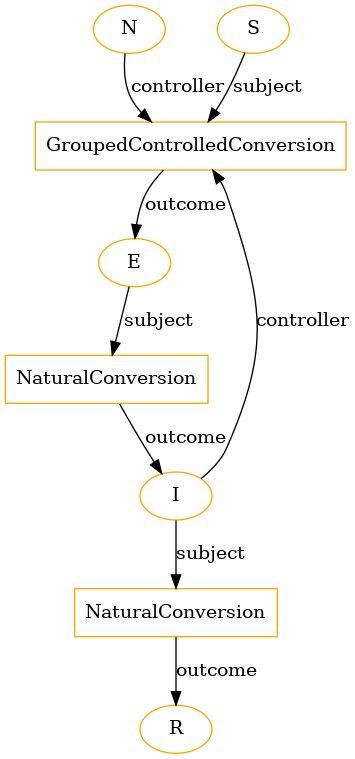

In [298]:
# Error free tm structure
error_free_tm_biomd_956.draw_jupyter()

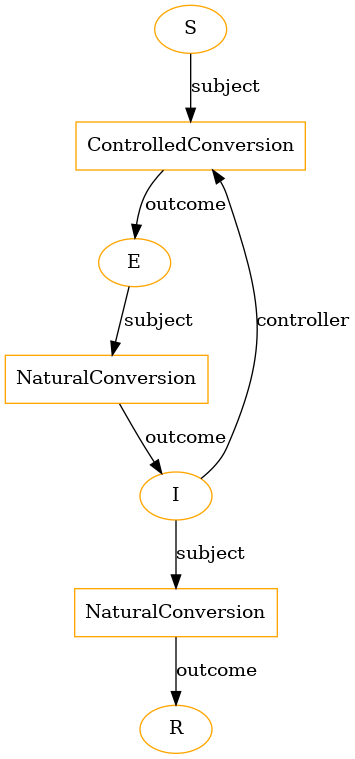

In [299]:
# Correct tm structure
correct_tm_biomd_956.draw_jupyter()

In [300]:
# BIOMODEL 957

# Executes straight out the box. 
# No edits are necessary. 
# The d parameter isn't defined in the Table 2 of the paper the model is derived from

original_ode_str_957 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, epsilon, rho, mu, d = sympy.symbols("beta epsilon rho mu d")

odes = [
    sympy.Eq(S(t).diff(t), - beta * S(t) * I(t)),
    sympy.Eq(E(t).diff(t), beta * S(t) * I(t) - epsilon * E(t)),
    sympy.Eq(I(t).diff(t), epsilon * E(t) - (rho + mu) * I(t)),
    sympy.Eq(R(t).diff(t), rho * I(t) - d * R(t))
]
"""

correct_tm_biomd_957 = execute_template_model_from_sympy_odes(
    ode_str=original_ode_str_957, attempt_grounding=False, client=client
)

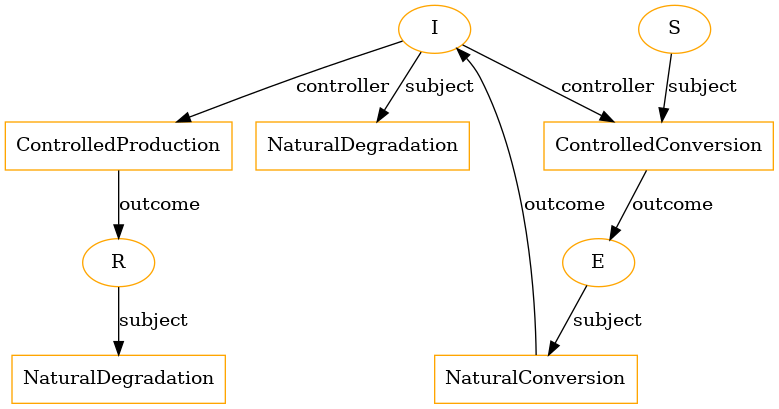

In [301]:
correct_tm_biomd_957.draw_jupyter()

In [302]:
# BIOMODEL 958

# Did not execute straight out the box

# Edits to make it to run
# 1. Missing parameter N (total population)
# 2. Conflates kappa parameter with rho when defining parameters, but correctly uses rho in system of equations. Have to add rho1 and rho2
# as parameters
# 3. Remove erroneous usage of kappa1 and kappa2 parameters in system of equations.

# Smaller correctness edits
# 1. Compartment P is not divided by N in the equation for compartment S
# 2. Missing -rho2 term in parenthesis in the equation for compartment A
# 3. Missing gamma_r as coefficient for H(t) in equation for compartment R
# 4. Remove kappa1 and kappa2 parameter definitions

# Structural correctness edits
# 1. Missing beta_prime * P(t)/N * S(t) term in equation for compartment E

original_ode_str_958 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, P, A, H, R, F = sympy.symbols("S E I P A H R F", cls=sympy.Function)

# Define the parameters
beta, l, b, beta_prime, kappa1, gamma_alpha, delta_i, kappa2, gamma_i, delta_p, gamma_r, delta_h = sympy.symbols("beta l b beta_prime kappa1 gamma_alpha delta_i kappa2 gamma_i delta_p gamma_r delta_h")

odes = [
    sympy.Eq(S(t).diff(t), -beta * I(t) / N * S(t) - l * beta * H(t) / N * S(t) - beta_prime * P(t) * S(t)),
    sympy.Eq(E(t).diff(t), beta * I(t) / N * S(t) + l * beta * H(t) / N * S(t) - kappa1 * E(t)),
    sympy.Eq(I(t).diff(t), kappa1 * rho1 * E(t) - (gamma_alpha + gamma_i) * I(t) - delta_i * I(t)),
    sympy.Eq(P(t).diff(t), kappa2 * rho2 * E(t) - (gamma_alpha + gamma_i) * P(t) - delta_p * P(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho1) * E(t)),
    sympy.Eq(H(t).diff(t), gamma_alpha * (I(t) + P(t)) - gamma_r * H(t) - delta_h * H(t)),
    sympy.Eq(R(t).diff(t), gamma_i * (I(t) + P(t)) * H(t)),
    sympy.Eq(F(t).diff(t), delta_i * I(t) + delta_p * P(t) + delta_h * H(t))
]
"""

error_free_ode_str_958 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, P, A, H, R, F = sympy.symbols("S E I P A H R F", cls=sympy.Function)

# Define the parameters
N, beta, l, b, beta_prime, kappa, gamma_alpha, delta_i, kappa2, gamma_i, delta_p, gamma_r, delta_h, rho1, rho2  = sympy.symbols("N beta l b beta_prime kappa gamma_alpha delta_i kappa2 gamma_i delta_p gamma_r delta_h rho1 rho2")

odes = [
    sympy.Eq(S(t).diff(t), -beta * I(t) / N * S(t) - l * beta * H(t) / N * S(t) - beta_prime * P(t) * S(t)),
    sympy.Eq(E(t).diff(t), beta * I(t) / N * S(t) + l * beta * H(t) / N * S(t) - kappa * E(t)),
    sympy.Eq(I(t).diff(t), kappa * rho1 * E(t) - (gamma_alpha + gamma_i) * I(t) - delta_i * I(t)),
    sympy.Eq(P(t).diff(t), kappa * rho2 * E(t) - (gamma_alpha + gamma_i) * P(t) - delta_p * P(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho1) * E(t)),
    sympy.Eq(H(t).diff(t), gamma_alpha * (I(t) + P(t)) - gamma_r * H(t) - delta_h * H(t)),
    sympy.Eq(R(t).diff(t), gamma_i * (I(t) + P(t)) * H(t)),
    sympy.Eq(F(t).diff(t), delta_i * I(t) + delta_p * P(t) + delta_h * H(t))
]
"""
error_free_tm_biomd_958 = execute_template_model_from_sympy_odes(
    ode_str=error_free_ode_str_958, attempt_grounding=False, client=client
)

correct_ode_str_958 = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, P, A, H, R, F = sympy.symbols("S E I P A H R F", cls=sympy.Function)

# Define the parameters
N, beta, l, b, beta_prime, kappa, gamma_alpha, delta_i, gamma_i, delta_p, gamma_r, delta_h, rho1, rho2 = sympy.symbols("N beta l b beta_prime kappa gamma_alpha delta_i gamma_i delta_p gamma_r delta_h rho1 rho2")

odes = [
    sympy.Eq(S(t).diff(t), -beta * I(t) / N * S(t) - l * beta * H(t) / N * S(t) - beta_prime * P(t) / N * S(t)),
    sympy.Eq(E(t).diff(t), beta * I(t) / N * S(t) + l * beta * H(t) / N * S(t) + beta_prime * P(t)/N * S(t) - kappa * E(t)),
    sympy.Eq(I(t).diff(t), kappa * rho1 * E(t) - (gamma_alpha + gamma_i) * I(t) - delta_i * I(t)),
    sympy.Eq(P(t).diff(t), kappa * rho2 * E(t) - (gamma_alpha + gamma_i) * P(t) - delta_p * P(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho1 - rho2) * E(t)),
    sympy.Eq(H(t).diff(t), gamma_alpha * (I(t) + P(t)) - gamma_r * H(t) - delta_h * H(t)),
    sympy.Eq(R(t).diff(t), gamma_i * (I(t) + P(t)) + gamma_r * H(t)),
    sympy.Eq(F(t).diff(t), delta_i * I(t) + delta_p * P(t) + delta_h * H(t))
]
"""


correct_tm_biomd_958 = execute_template_model_from_sympy_odes(
    ode_str=correct_ode_str_958, attempt_grounding=False, client=client
)

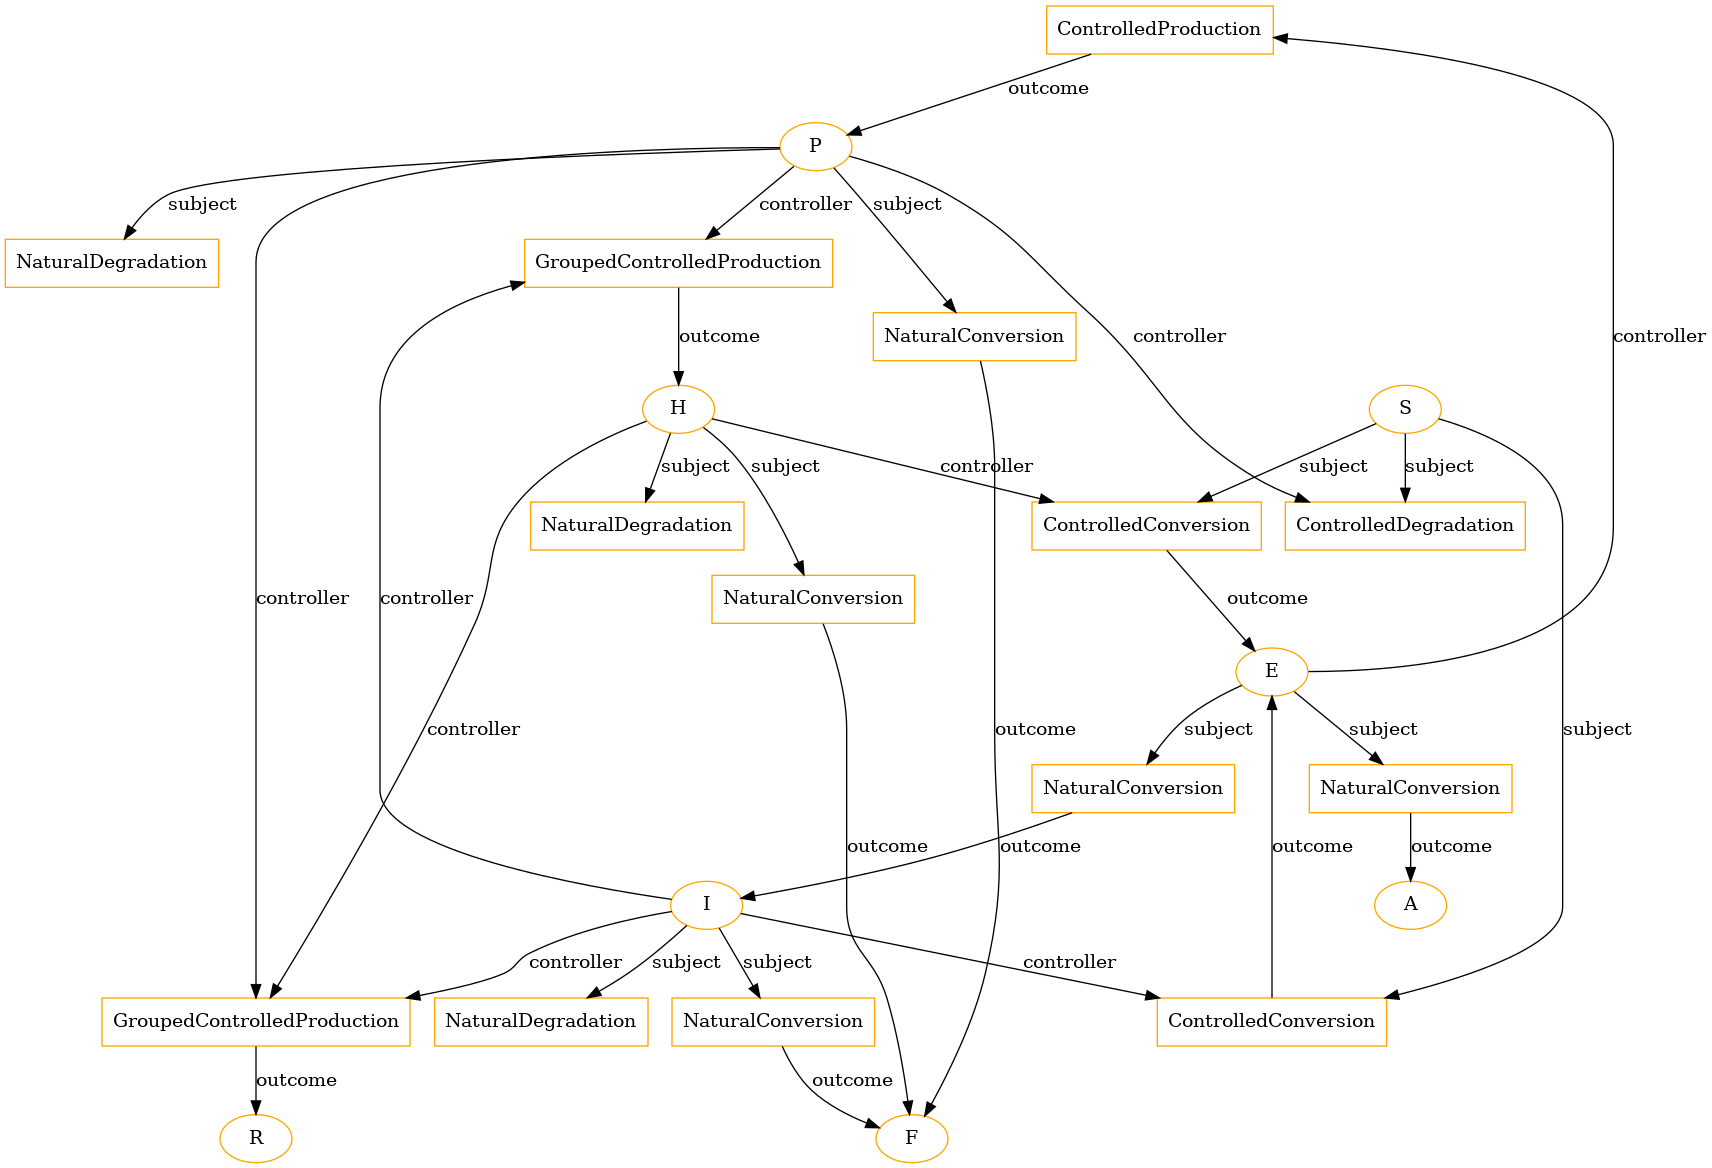

In [303]:
# Error-free tm structure
error_free_tm_biomd_958.draw_jupyter()

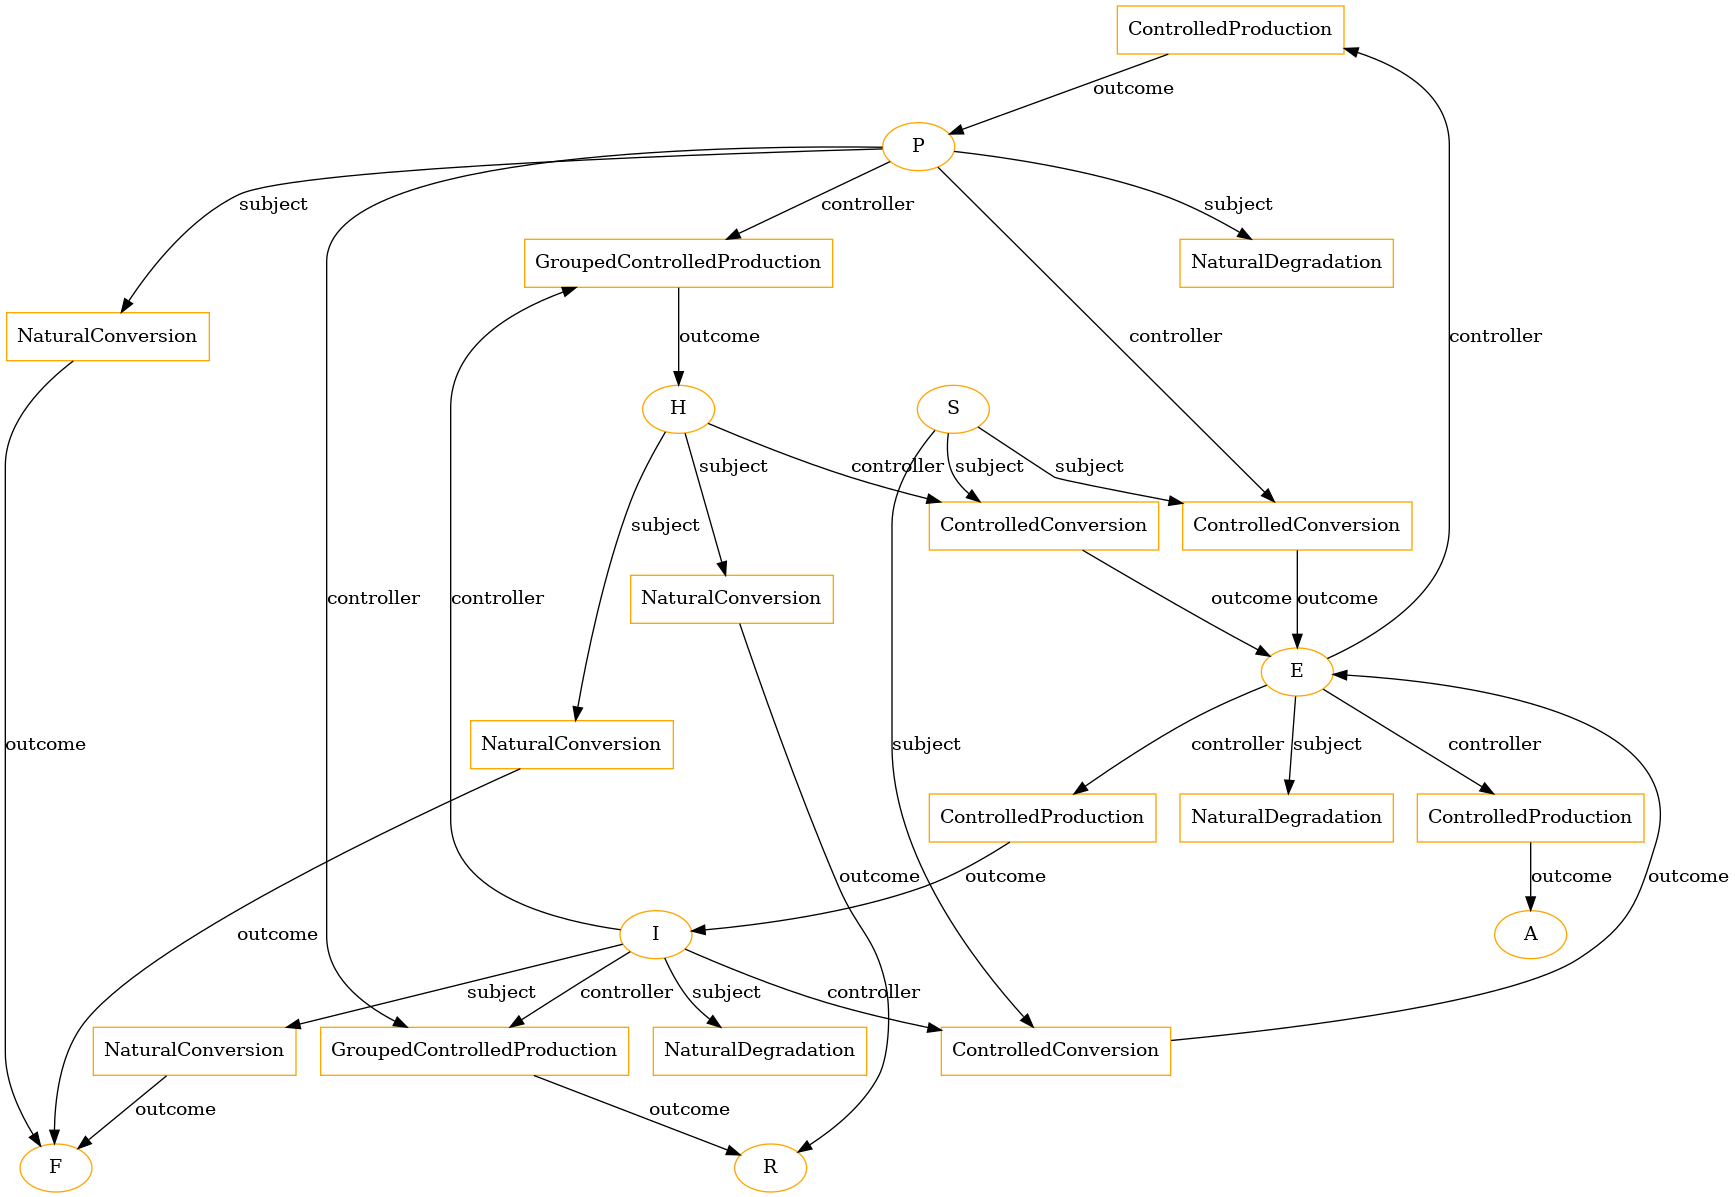

In [304]:
# Correct tm structure
correct_tm_biomd_958.draw_jupyter()

In [305]:
# BIOMODEL 960

# Did not execute straight out the box

# Edits to make it run
# 1. Does not define gamma_r parameter used in system of equations
# 2. Uses undefined gamma_H parameter in system of equations
# 3. Does not define delta_A parameter used in system of equations

# Smaller correctness edits
# 1. Does not use l, l_a parameters used in the equation for compartment S. Incorrectly replaces them with kappa and delta_I respectively.
# 2. Does not use l, l_a parameters used in equation for compartment E. Incorrectly replaces them with kappa and delta_I respectively.
# 3. Incorrectly defines an extra parameter "mu_A" and uses it when "mu" should be used in equation for compartment A.
# 4. Incorrectly defines an extra parameter "mu_A" and uses it when "mu" should be used in equation for compartment D.
# 5. Missing delta_A multiplier for mu*A(t) term in equation for compartment D.

original_ode_str_960 = """
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, A, H, R, D = sympy.symbols("S E I A H R D", cls=sympy.Function)

# Define the parameters
beta, kappa, gamma_a, gamma_I, delta_H, delta_I, mu_A, mu, rho, N = sympy.symbols("beta kappa gamma_a gamma_I delta_H delta_I mu_A mu rho N")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * beta * (I(t) + kappa * A(t) + delta_I * H(t)) / N),
    sympy.Eq(E(t).diff(t), S(t) * beta * (I(t) + kappa * A(t) + delta_I * H(t)) / N - kappa * E(t)),
    sympy.Eq(I(t).diff(t), kappa * rho * E(t) - (gamma_a + gamma_I + delta_I) * I(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho) * E(t) - mu_A * A(t)),
    sympy.Eq(H(t).diff(t), gamma_a * I(t) - (gamma_r + delta_H) * H(t)),
    sympy.Eq(R(t).diff(t), gamma_I * I(t) + gamma_H * H(t) + mu * (1 - delta_A) * A(t)),
    sympy.Eq(D(t).diff(t), delta_H * H(t) + delta_I * I(t) + mu_A * A(t))
]
"""

correct_ode_str_960 = """
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, A, H, R, D = sympy.symbols("S E I A H R D", cls=sympy.Function)

# Define the parameters
l, l_a, beta, kappa, gamma_a, gamma_I, gamma_r, delta_H, delta_I, delta_A, mu_A, mu, rho, N = sympy.symbols("l l_a beta kappa gamma_a gamma_I gamma_r delta_H delta_I delta_A mu_A mu rho N")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * beta * (I(t) + l_a * A(t) + l * H(t)) / N),
    sympy.Eq(E(t).diff(t), S(t) * beta * (I(t) + l_a * A(t) + l * H(t)) / N - kappa * E(t)),
    sympy.Eq(I(t).diff(t), kappa * rho * E(t) - (gamma_a + gamma_I + delta_I) * I(t)),
    sympy.Eq(A(t).diff(t), kappa * (1 - rho) * E(t) - mu * A(t)),
    sympy.Eq(H(t).diff(t), gamma_a * I(t) - (gamma_r + delta_H) * H(t)),
    sympy.Eq(R(t).diff(t), gamma_I * I(t) + gamma_r * H(t) + mu * (1 - delta_A) * A(t)),
    sympy.Eq(D(t).diff(t), delta_H * H(t) + delta_I * I(t) + mu * delta_A * A(t))
]
"""

correct_tm_biomd_960 = execute_template_model_from_sympy_odes(
    ode_str=correct_ode_str_960, attempt_grounding=False, client=client
)

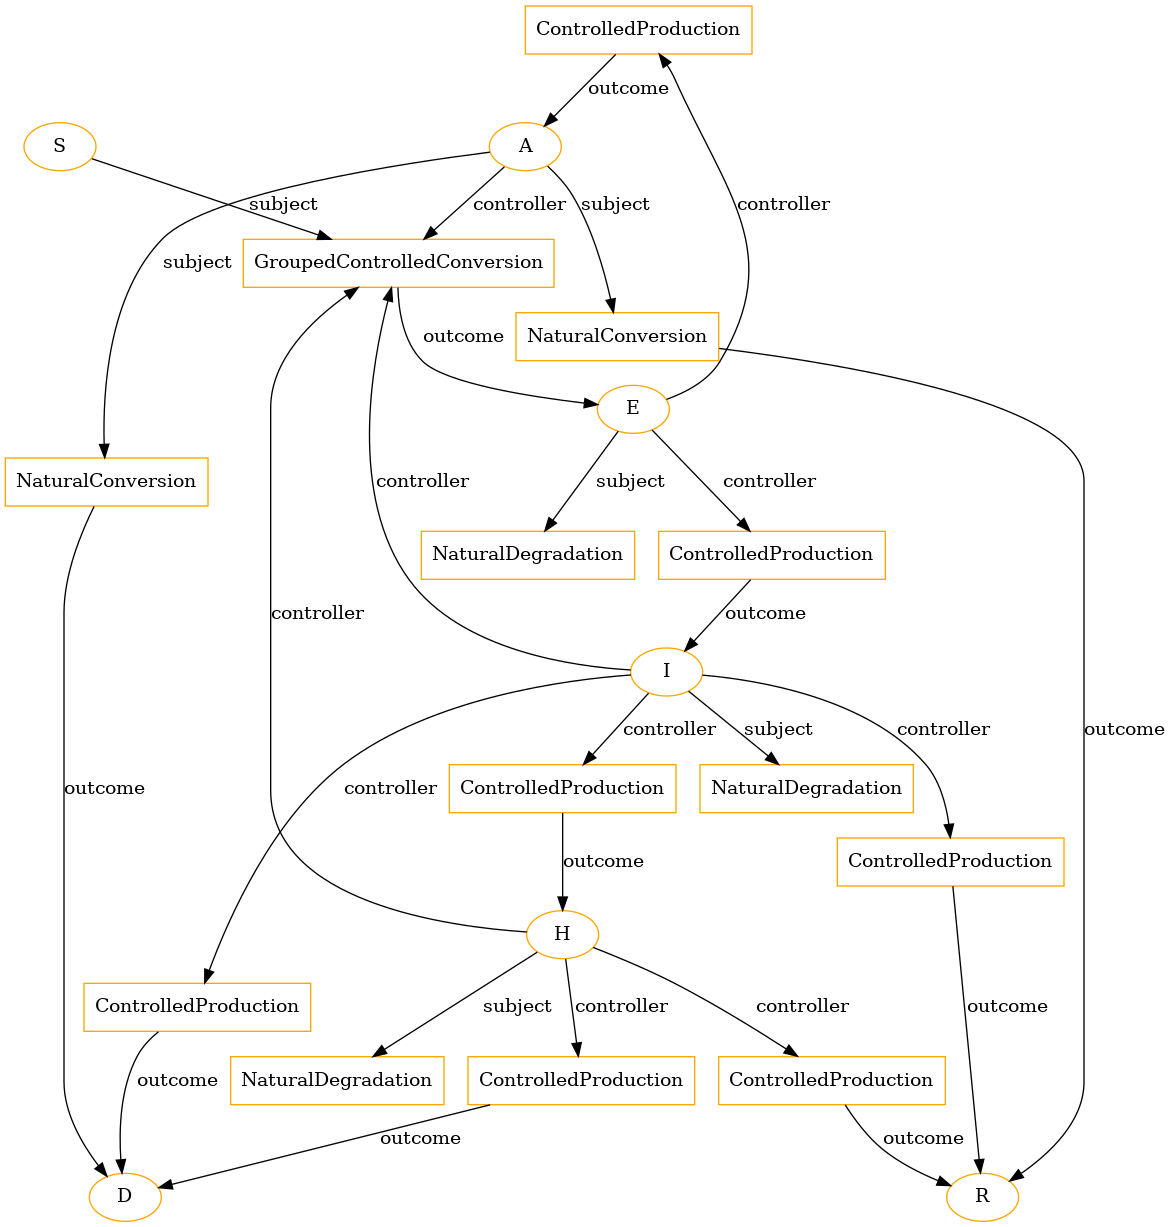

In [306]:
correct_tm_biomd_960.draw_jupyter()

In [307]:
# December 2024 Hackathon Epi Scenario 1 Model A

# Does not run right out the box

# Edits to make it run
# 1. Does not define theta1 parameter used in equation for compartment I_2
# 2. Does not define lambda_f parameter used in equations for compartments S_f and E_f
# 3. Does not define mu_f parameter used in equation for compartments S_f, E_f, I_f, and R_f
# 4. Does not define sigma_f parameter used in equation for compartments E_f and I_f
# 5. Does not define delta_f parameter used in equation for compartment I_f
# 6. Does not define tau_f parameter used in equation for comparments I_f and R_f
# 7. Does not define sigma_r used in equation for compartment I_r
# 8. Confuses "r" for "f" in some subscripts for compartment and parameter names. Uses e_r(t) correctly in equation for compartment I_r,
# but defines e_r as e_f when defining time-dependent variables. Uses e_f(t) incorrectly instead of e_r(t) in equation for compartments
# E_f and I_f. Rename e_f to e_r in left-hand side for definition of e_f(t).
# 9. Does not define delta_r parameter used in equation for compartment I_r
# 10. Does not define mu_r parameter used in equation for compartments I_r and R_r
# 11. Does not define tau_r parameter used in equation for compartment R_r

# Smaller correctness edits
# 1. Multiplies first term by "pi" instead of "pi_h". Remove "pi" and add "pi_h" as parameter.
# 2. Incorrectly multiplies first term by "s_h(t)" and does not add "- mu_h * s_h(t)" term in equation for compartment S_h.
# 3. Uses incorrect "v" parameter instead of "nu" parameter in equation for compartment E_h. "v" and the symbol for "nu" look alike.
#    Remove unused parameter "v".
# 4. Uses "k2" and "tau2" parameters instead of "theta" and "mu_h" parameters in summation in parenthesis in equation for compartment I_1.
# 5. Incorrectly labels "theta" as "theta1". Rename "theta1" to "theta".
# 6. Does not add "mu_h" and incorrectly labels "delta" as "delta_i" parameter in summation in parenthesis that's apart of the
#    second term in equation for compartment I_2.
# 7. Rename "delta" to "delta_i".
# 8. Missing tau3 and delta_h parameters that have to be added to mu_h term in equation for compartment H.
# 9. Rename "delta_f" to "delta_h" as LLM confuses subscript r with f sometimes for compartment and parameter names.
# 10. Uses "pi" instead of "pi_r" parameter in equation for compartment S_f. Have to define pi_r parameter.
# 11. Uses "lambda_f*s_f(t) - mu_f*s_f(t)" instead of "lambda_r*s_r(t) - mu_r*s_r(t)" in equation for compartment S_f. Replace
#     lambda_f definition with lambda_r. Replace s_f time-dependent variable definition with s_r.
# 12. Uses "sigma_f" and "mu_f" instead of "sigma_r" and "mu_r" in equation for compartment E_r. Remove "sigma_f" and "mu_f" as parameters.
# 13. Add "tau_r" parameter missing in summation in parenthesis in equation for compartment I_r.

# Structural correctness edits
# 1. Does not multiply first theta term by "i1(t)" in equation for compartment I_2.
# 2. Does not subtract first term from second term in equation for compartment I_2.
# 3. Incorrectly multiplies first and second term instead of adding them in equation for compartment H.
# 4. Missing "tau3*h(t)" term to be added in equation for compartment R_h.
# 5. Incorrectly multiplies "tau2" parameter by "h(t)" instead of "i2(t)" in equation for compartment R_h.
# 6. Remove two additional equation definitions for non-existent compartments I_f and R_f and their time-dependent variable definitions.



original_ode_string_2024_dec_epi_1_model_A = """
Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
s1, s_h, e_h, p, i1, i2, h, r_h, s_f, e_f, i_f, r_f, e_r, i_r, r_r = sympy.symbols("s1 s_h e_h p i1 i2 h r_h s_f e_f i_f r_f e_r i_r r_r", cls=sympy.Function)

# Define the parameters
pi, rho, nu, mu_h, lambda_h, v, omega, k1, k2, k3, tau1, tau2, tau3, delta, sigma = sympy.symbols("pi rho nu mu_h lambda_h v omega k1 k2 k3 tau1 tau2 tau3 delta sigma")

odes = [
    sympy.Eq(s1(t).diff(t), pi * (1 - rho) - nu * lambda_h * s1(t) - mu_h * s1(t)),
    sympy.Eq(s_h(t).diff(t), mu_h * rho * s_h(t) - lambda_h * s_h(t)),
    sympy.Eq(e_h(t).diff(t), (v * s1(t) + s_h(t)) * lambda_h - (sigma + mu_h) * e_h(t)),
    sympy.Eq(p(t).diff(t), sigma * e_h(t) - (omega + mu_h) * p(t)),
    sympy.Eq(i1(t).diff(t), omega * p(t) - (k1 + k2 + tau1 + tau2) * i1(t)),
    sympy.Eq(i2(t).diff(t), theta1 * (k2 + delta + tau2) * i2(t)),
    sympy.Eq(h(t).diff(t), k1 * i1(t) * k2 * i2(t) - mu_h * h(t)),
    sympy.Eq(r_h(t).diff(t), tau1 * i1(t) + tau2 * h(t) - mu_h * r_h(t)),
    sympy.Eq(s_f(t).diff(t), pi - lambda_f * s_f(t) - mu_f * s_f(t)),
    sympy.Eq(e_f(t).diff(t), lambda_f * s_f(t) - (sigma_f + mu_f) * e_f(t)),
    sympy.Eq(i_f(t).diff(t), sigma_f * e_f(t) - (delta_f + tau_f + mu_f) * i_f(t)),
    sympy.Eq(r_f(t).diff(t), tau_f * i_f(t) - mu_f * r_f(t)),
    sympy.Eq(i_r(t).diff(t), sigma_r * e_r(t) - (delta_r + mu_r) * i_r(t)),
    sympy.Eq(r_r(t).diff(t), tau_r * i_r(t) - mu_r * r_r(t))
]
"""

error_free_ode_string_2024_dec_epi_1_model_A = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
s1, s_h, e_h, p, i1, i2, h, r_h, s_f, e_f, i_f, r_f, e_r, i_r, r_r = sympy.symbols("s1 s_h e_h p i1 i2 h r_h s_f e_f i_f r_f e_r i_r r_r", cls=sympy.Function)

# Define the parameters
theta1, lambda_f, mu_f, sigma_f, delta_f, tau_f, sigma_r, delta_r, mu_r, tau_r, pi, rho, nu, mu_h, lambda_h, v, omega, k1, k2, k3, tau1, tau2, tau3, delta, sigma = sympy.symbols("theta1 lambda_f mu_f sigma_f delta_f tau_f sigma_r delta_r mur_r tau_r pi rho nu mu_h lambda_h v omega k1 k2 k3 tau1 tau2 tau3 delta sigma")

odes = [
    sympy.Eq(s1(t).diff(t), pi * (1 - rho) - nu * lambda_h * s1(t) - mu_h * s1(t)),
    sympy.Eq(s_h(t).diff(t), mu_h * rho * s_h(t) - lambda_h * s_h(t)),
    sympy.Eq(e_h(t).diff(t), (v * s1(t) + s_h(t)) * lambda_h - (sigma + mu_h) * e_h(t)),
    sympy.Eq(p(t).diff(t), sigma * e_h(t) - (omega + mu_h) * p(t)),
    sympy.Eq(i1(t).diff(t), omega * p(t) - (k1 + k2 + tau1 + tau2) * i1(t)),
    sympy.Eq(i2(t).diff(t), theta1 * (k2 + delta + tau2) * i2(t)),
    sympy.Eq(h(t).diff(t), k1 * i1(t) * k2 * i2(t) - mu_h * h(t)),
    sympy.Eq(r_h(t).diff(t), tau1 * i1(t) + tau2 * h(t) - mu_h * r_h(t)),
    sympy.Eq(s_f(t).diff(t), pi - lambda_f * s_f(t) - mu_f * s_f(t)),
    sympy.Eq(e_r(t).diff(t), lambda_f * s_f(t) - (sigma_f + mu_f) * e_f(t)),
    sympy.Eq(i_f(t).diff(t), sigma_f * e_f(t) - (delta_f + tau_f + mu_f) * i_f(t)),
    sympy.Eq(r_f(t).diff(t), tau_f * i_f(t) - mu_f * r_f(t)),
    sympy.Eq(i_r(t).diff(t), sigma_r * e_r(t) - (delta_r + mu_r) * i_r(t)),
    sympy.Eq(r_r(t).diff(t), tau_r * i_r(t) - mu_r * r_r(t))
]
"""

error_free_tm_2024_dec_epi1_modelA = execute_template_model_from_sympy_odes(
    ode_str=error_free_ode_string_2024_dec_epi_1_model_A,
    attempt_grounding=False,
    client=client,
)

correct_ode_string_2024_dec_epi_1_model_A = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
s1, s_h, e_h, p, i1, i2, h, r_h, s_r, e_r, i_r, r_r = sympy.symbols("s1 s_h e_h p i1 i2 h r_h s_r e_r i_r r_r", cls=sympy.Function)

# Define the parameters
theta, pi_h, pi_r, rho, nu, mu_h, mu_r, lambda_h, lambda_r, omega, k1, k2, k3, tau1, tau2, tau3, tau_f, tau_r, delta_i, delta_h, delta_r, sigma,  sigma_r = sympy.symbols("theta pi_h pi_r rho nu mu_h  mu_r lambda_h lambda_f omega k1 k2 k3 tau1 tau2 tau3 tau_f tau_r delta_i delta_h delta_r sigma  sigma_r")
odes = [
    sympy.Eq(s1(t).diff(t), pi_h * (1 - rho) - nu * lambda_h * s1(t) - mu_h * s1(t)),
    sympy.Eq(s_h(t).diff(t), mu_h * rho - lambda_h * s_h(t) - mu_h * s_h(t)),
    sympy.Eq(e_h(t).diff(t), (nu * s1(t) + s_h(t)) * lambda_h - (sigma + mu_h) * e_h(t)),
    sympy.Eq(p(t).diff(t), sigma * e_h(t) - (omega + mu_h) * p(t)),
    sympy.Eq(i1(t).diff(t), omega * p(t) - (theta + k1 + tau1 + mu_h) * i1(t)),
    sympy.Eq(i2(t).diff(t), theta * i1(t) - (k2 + delta_i + tau2 + mu_h) * i2(t)),
    sympy.Eq(h(t).diff(t), k1 * i1(t) + k2 * i2(t) - (mu_h + tau3 + delta_h) * h(t)),
    sympy.Eq(r_h(t).diff(t), tau1 * i1(t) + tau2 * i2(t) + tau3*h(t) - mu_h * r_h(t)),
    sympy.Eq(s_r(t).diff(t), pi_r - lambda_r * s_r(t) - mu_r * s_r(t)),
    sympy.Eq(e_r(t).diff(t), lambda_r * s_r(t) - (sigma_r + mu_r) * e_r(t)),
    sympy.Eq(i_r(t).diff(t), sigma_r * e_r(t) - (delta_r + mu_r + tau_r) * i_r(t)),
    sympy.Eq(r_r(t).diff(t), tau_r * i_r(t) - mu_r * r_r(t))
]
"""


correct_tm_2024_dec_epi1_modelA = execute_template_model_from_sympy_odes(
    ode_str=correct_ode_string_2024_dec_epi_1_model_A,
    attempt_grounding=False,
    client=client,
)

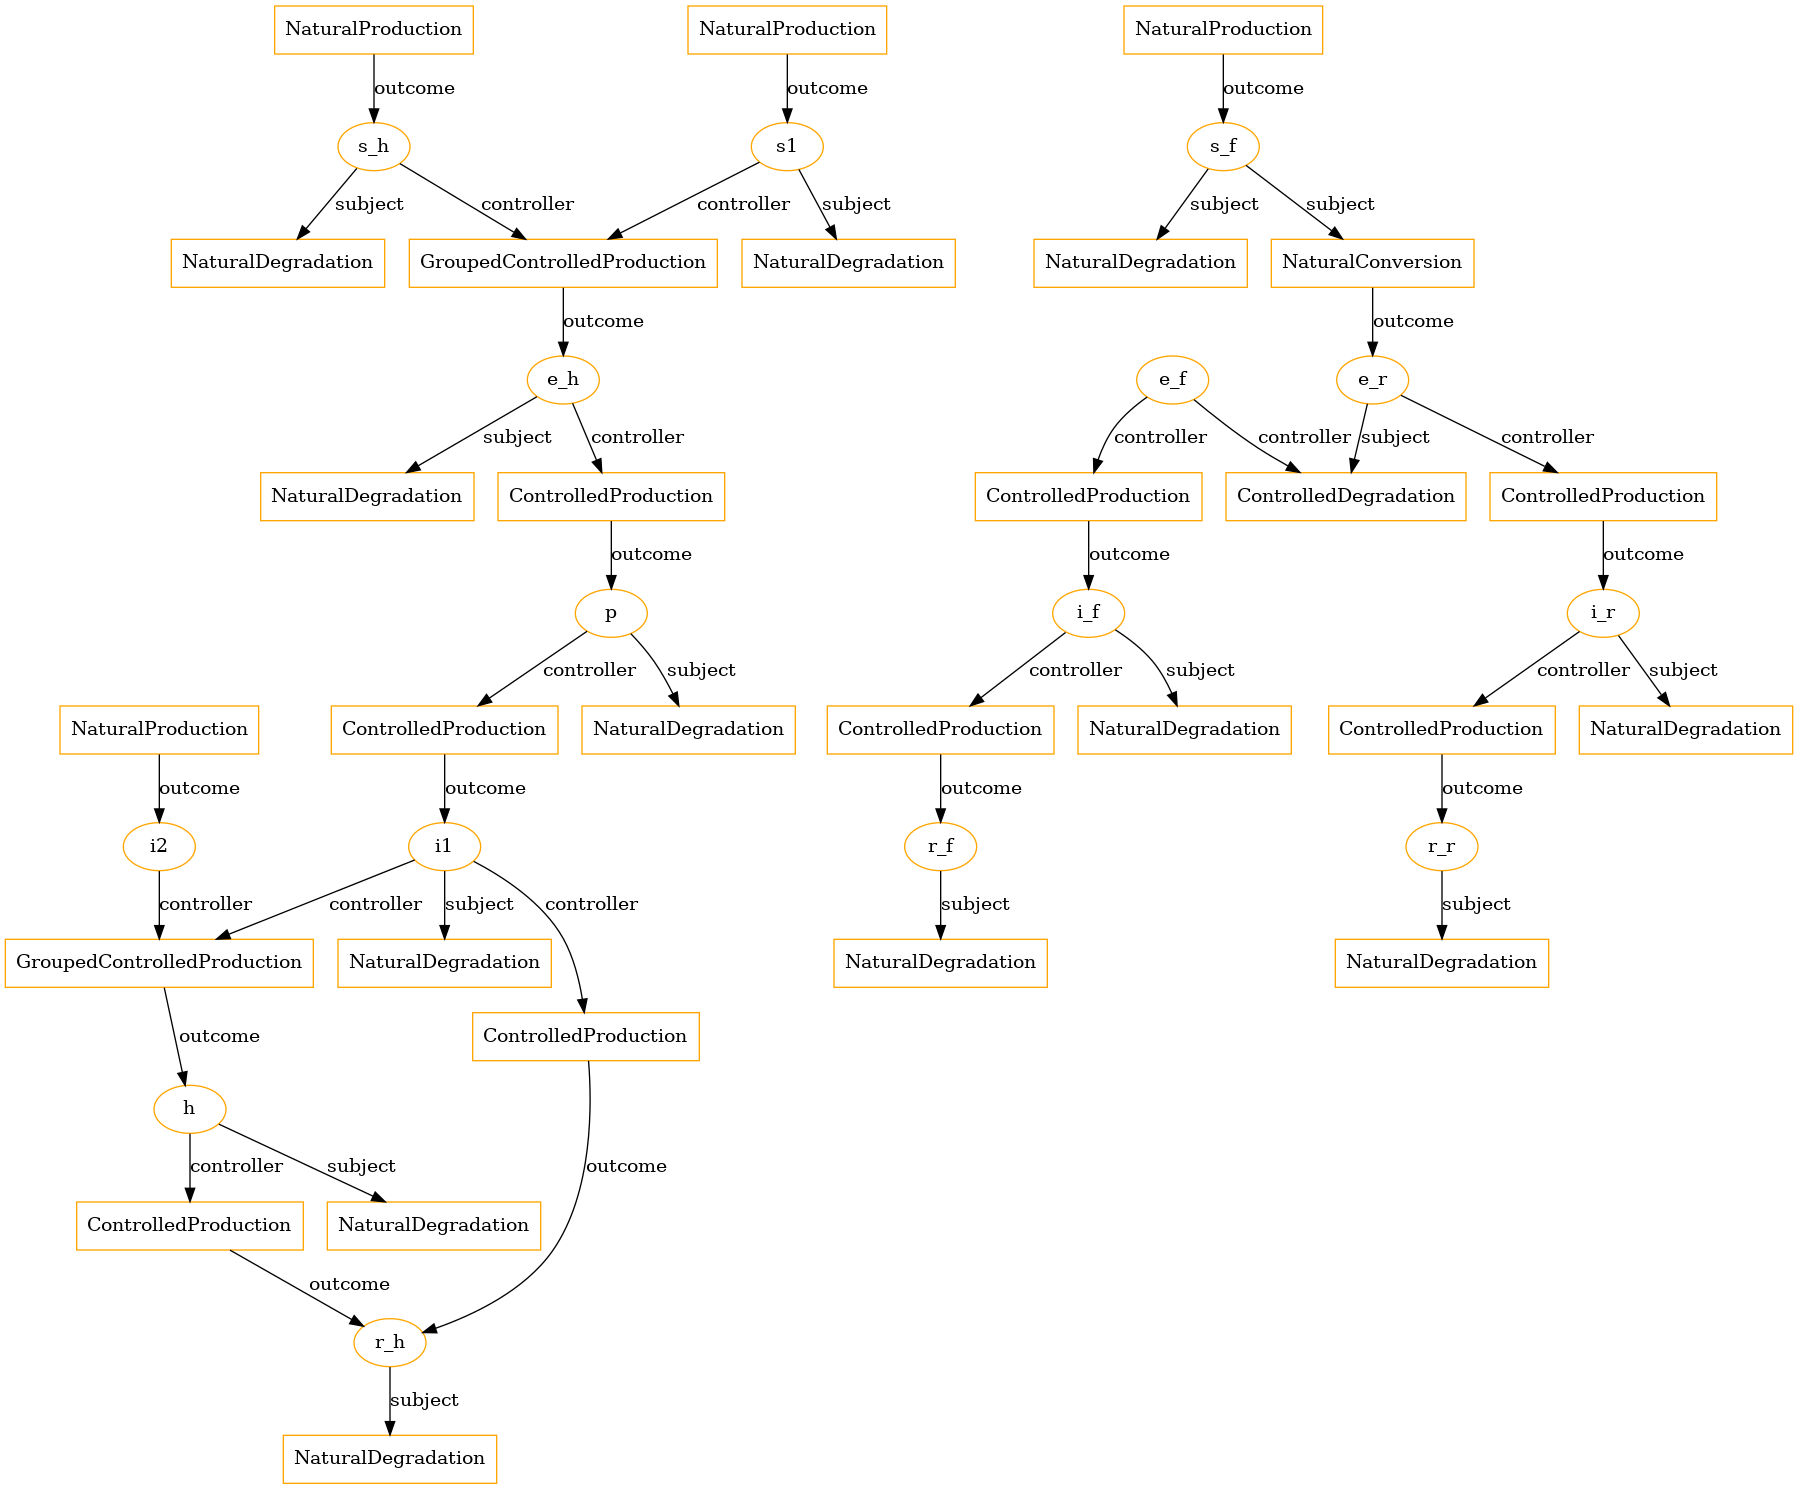

In [308]:
# Error-free tm structure
error_free_tm_2024_dec_epi1_modelA.draw_jupyter()

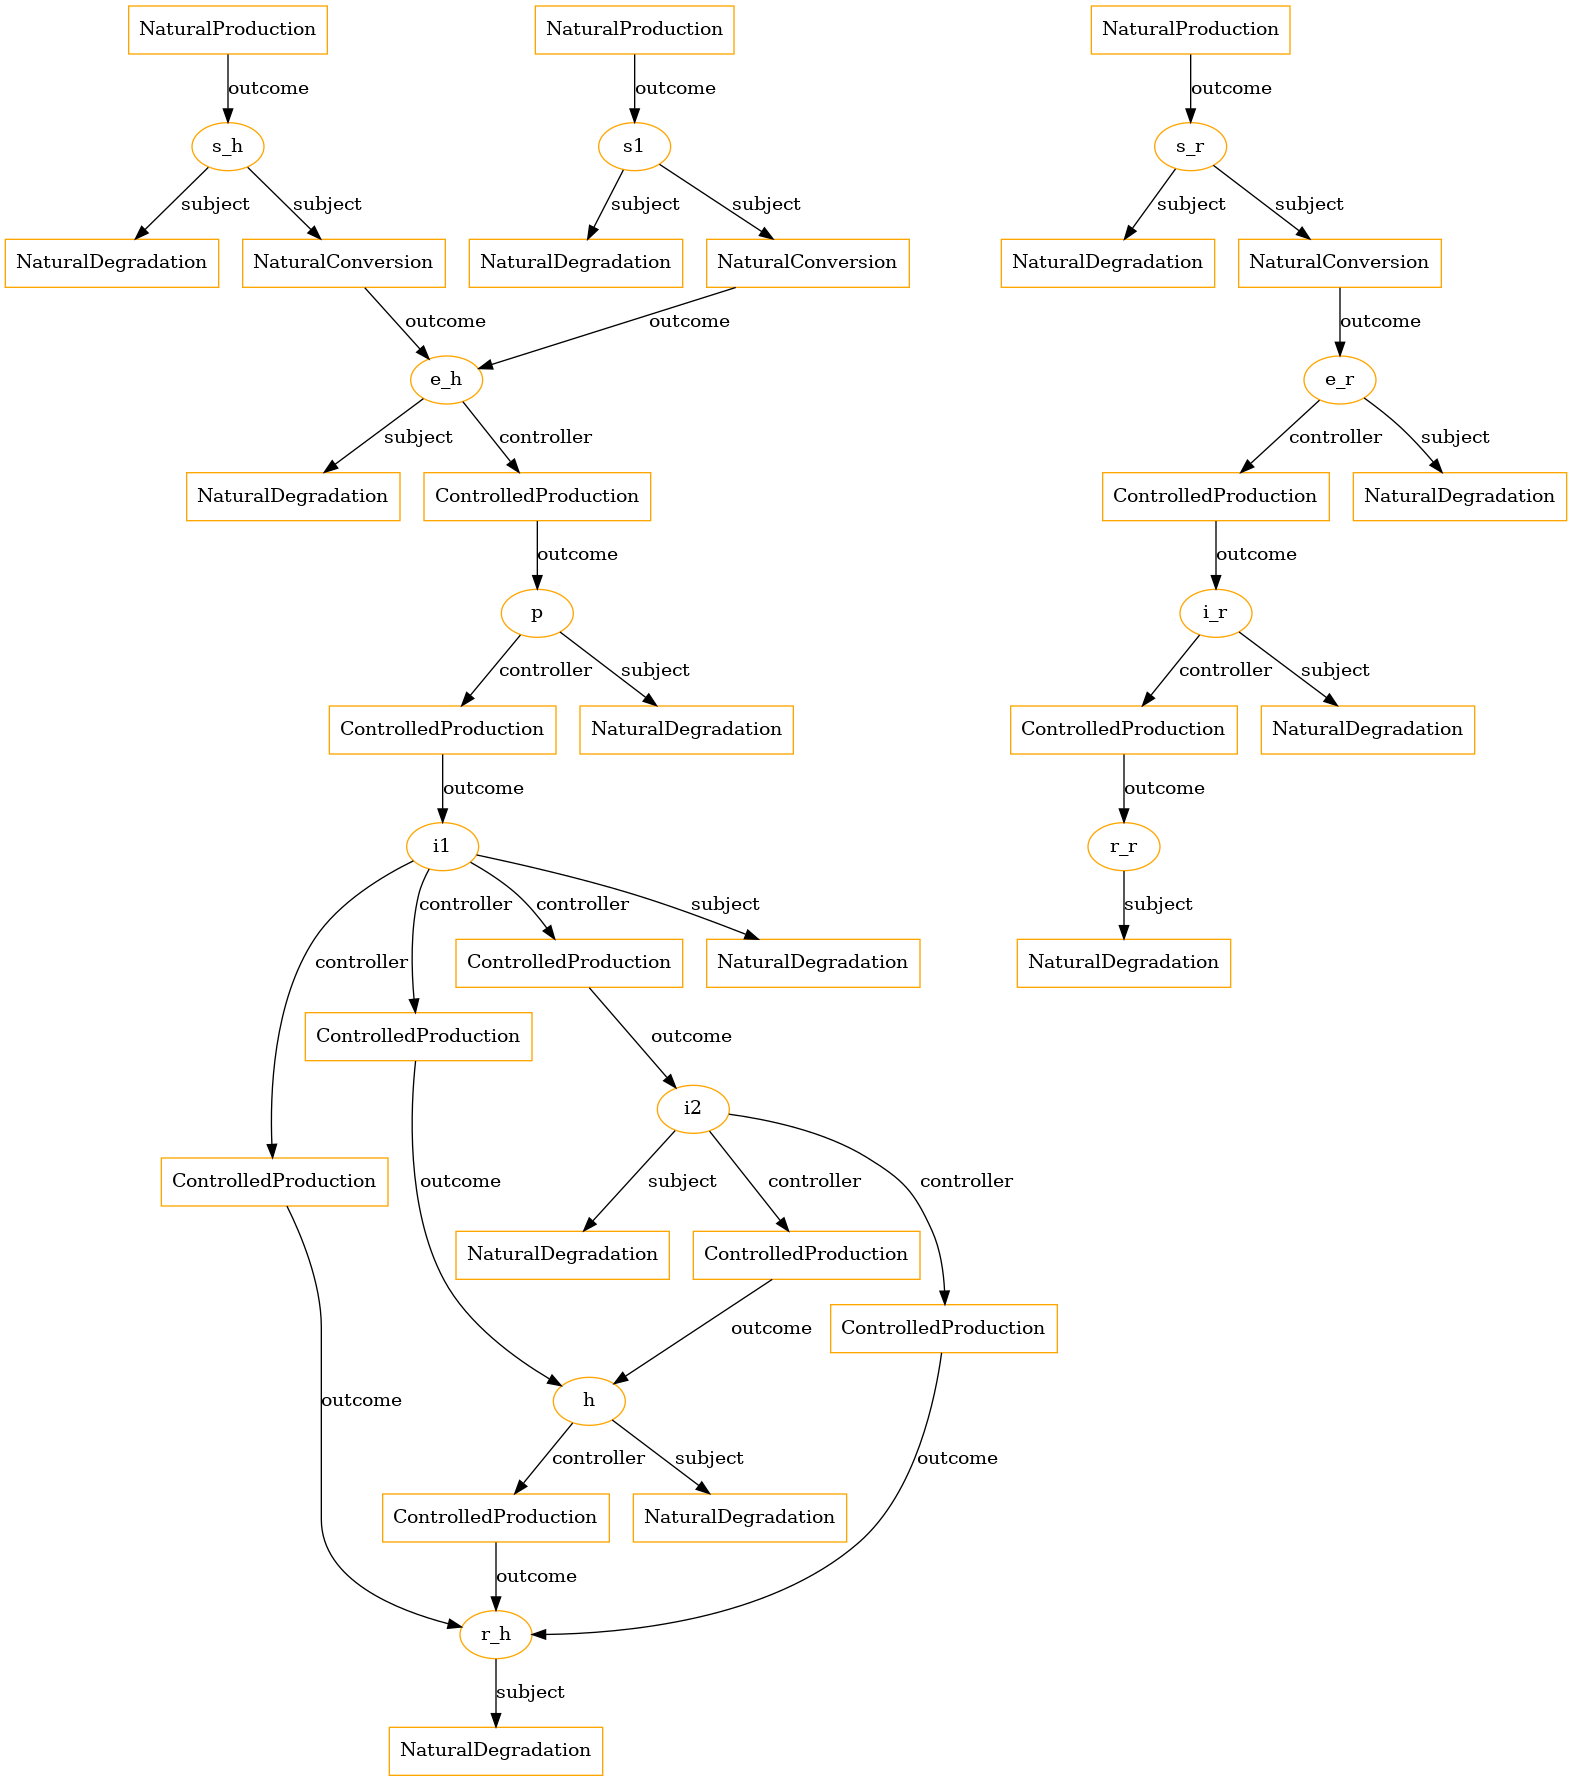

In [309]:
# Correct tm structure
correct_tm_2024_dec_epi1_modelA.draw_jupyter()

In [310]:
# December 2024 Hackathon Epi Scenario 1 Model B

# Did not execute straight out the box

# Edits to make it run
# 1. Does not define tau parameter used in compartment Q_h
# 2. Missing i_r time-dependent variable definition

# Smaller correctness edits
# 1. Multiplies "beta_1" by "ih(t)" instead of "ir(t)" in equation for compartment S_h. Due to "h" and "r" subscript conflation by LLM. 
# 2. Missing beta_h term in equation for compartment S_h. Define beta_h as a parameter.
# 3. Multiplies "beta_1" by "ih(t)" instead of "ir(t)" in equation for compartment E_h. Due to "h" and "r" subscript conflation by LLM.
# 4. Missing initial "beta_r" term in equation for compartment S_r. Define beta_r as a parameter. 
# 5. Replace "beta_s" term with "beta_3" term in equation for compartment S_r. Define beta_3 as a parameter.
# 6. Replace "beta_s" term with "beta_3" in equation for compartment E_r.
# 7. Replace "mu_t" term with "mu_r" in equation for compartment E_r.  
# 8. Replace "mu_t" term with "mu_r" in equation for compartment I_r.  
# 9. Replace "delta_h" term with "delta_r" in equation for compartment I_r. Define delta_r as a parameter. 

# Structural correctness edits
# 1. Missing "tau*qh(t)" term that's added to "gamma * qh(t)" in equation for compartment R_h
# 2. Add "-mu_r*sr(t)" term to equation for compartment S_r. Define mu_r as a parameter. 


original_ode_string_2024_dec_epi_1_model_B = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
sh, eh, ih, qh, rh, sr, er = sympy.symbols("sh eh ih qh rh sr er", cls=sympy.Function)

# Define the parameters
beta_1, beta_2, mu_h, phi, N_h, alpha_1, alpha_2, gamma, beta_s, N_r, mu_t, delta_h, alpha_3 = sympy.symbols("beta_1 beta_2 mu_h phi N_h alpha_1 alpha_2 gamma beta_s N_r mu_t delta_h alpha_3")

odes = [
    sympy.Eq(sh(t).diff(t), (beta_1 * ih(t) + beta_2 * ih(t)) * sh(t) / N_h - mu_h * sh(t) + phi * qh(t)),
    sympy.Eq(eh(t).diff(t), (beta_1 * ih(t) + beta_2 * ih(t)) * sh(t) / N_h - (alpha_1 + alpha_2 + mu_h) * eh(t)),
    sympy.Eq(ih(t).diff(t), alpha_1 * eh(t) - (mu_h + delta_h + gamma) * ih(t)),
    sympy.Eq(qh(t).diff(t), alpha_2 * eh(t) - (phi + tau + delta_h + mu_h) * qh(t)),
    sympy.Eq(rh(t).diff(t), gamma * qh(t) - mu_h * rh(t)),
    sympy.Eq(sr(t).diff(t), - beta_s * sr(t) * ir(t) / N_r),
    sympy.Eq(er(t).diff(t), beta_s * sr(t) * ir(t) / N_r - (mu_t + alpha_3) * er(t)),
    sympy.Eq(ir(t).diff(t), alpha_3 * er(t) - (mu_t + delta_h) * ir(t))
]
"""

error_free_ode_string_2024_dec_epi_1_model_B = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
sh, eh, ih, qh, rh, sr, er, ir = sympy.symbols("sh eh ih qh rh sr er ir", cls=sympy.Function)

# Define the parameters
tau, beta_1, beta_2, mu_h, phi, N_h, alpha_1, alpha_2, gamma, beta_s, N_r, mu_t, delta_h, alpha_3 = sympy.symbols("tau beta_1 beta_2 mu_h phi N_h alpha_1 alpha_2 gamma beta_s N_r mu_t delta_h alpha_3")

odes = [
    sympy.Eq(sh(t).diff(t), (beta_1 * ih(t) + beta_2 * ih(t)) * sh(t) / N_h - mu_h * sh(t) + phi * qh(t)),
    sympy.Eq(eh(t).diff(t), (beta_1 * ih(t) + beta_2 * ih(t)) * sh(t) / N_h - (alpha_1 + alpha_2 + mu_h) * eh(t)),
    sympy.Eq(ih(t).diff(t), alpha_1 * eh(t) - (mu_h + delta_h + gamma) * ih(t)),
    sympy.Eq(qh(t).diff(t), alpha_2 * eh(t) - (phi + tau + delta_h + mu_h) * qh(t)),
    sympy.Eq(rh(t).diff(t), gamma * qh(t) - mu_h * rh(t)),
    sympy.Eq(sr(t).diff(t), - beta_s * sr(t) * ir(t) / N_r),
    sympy.Eq(er(t).diff(t), beta_s * sr(t) * ir(t) / N_r - (mu_t + alpha_3) * er(t)),
    sympy.Eq(ir(t).diff(t), alpha_3 * er(t) - (mu_t + delta_h) * ir(t))
]
"""



error_free_tm_2024_dec_epi1_modelB = execute_template_model_from_sympy_odes(
    ode_str=error_free_ode_string_2024_dec_epi_1_model_B,
    attempt_grounding=False,
    client=client,
)


correct_ode_string_2024_dec_epi_1_model_B = """
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
sh, eh, ih, qh, rh, sr, er, ir = sympy.symbols("sh eh ih qh rh sr er ir", cls=sympy.Function)

# Define the parameters
tau, beta_1, beta_2, beta_3, beta_h, beta_r, mu_h, phi, N_h, alpha_1, alpha_2, gamma, beta_s, N_r, mu_t, mu_r, delta_h, delta_r, alpha_3 = sympy.symbols("tau beta_1 beta_2 beta_3 beta_h beta_r mu_h phi N_h alpha_1 alpha_2 gamma beta_s N_r mu_t mu_r delta_h delta_r alpha_3")

odes = [
    sympy.Eq(sh(t).diff(t), beta_h - (beta_1 * ir(t) + beta_2 * ih(t)) * sh(t) / N_h - mu_h * sh(t) + phi * qh(t)),
    sympy.Eq(eh(t).diff(t), (beta_1 * ir(t) + beta_2 * ih(t)) * sh(t) / N_h - (alpha_1 + alpha_2 + mu_h) * eh(t)),
    sympy.Eq(ih(t).diff(t), alpha_1 * eh(t) - (mu_h + delta_h + gamma) * ih(t)),
    sympy.Eq(qh(t).diff(t), alpha_2 * eh(t) - (phi + tau + delta_h + mu_h) * qh(t)),
    sympy.Eq(rh(t).diff(t), gamma * qh(t) + tau*qh(t) - mu_h * rh(t)),
    
    sympy.Eq(sr(t).diff(t), beta_r - (beta_3 * sr(t) * ir(t) / N_r) - mu_r*sr(t)),
    
    sympy.Eq(er(t).diff(t), beta_3 * sr(t) * ir(t) / N_r - (mu_r + alpha_3) * er(t)),
    sympy.Eq(ir(t).diff(t), alpha_3 * er(t) - (mu_r + delta_r) * ir(t))
]
"""

correct_tm_2024_dec_epi1_modelB = execute_template_model_from_sympy_odes(
    ode_str=correct_ode_string_2024_dec_epi_1_model_B,
    attempt_grounding=False,
    client=client,
)

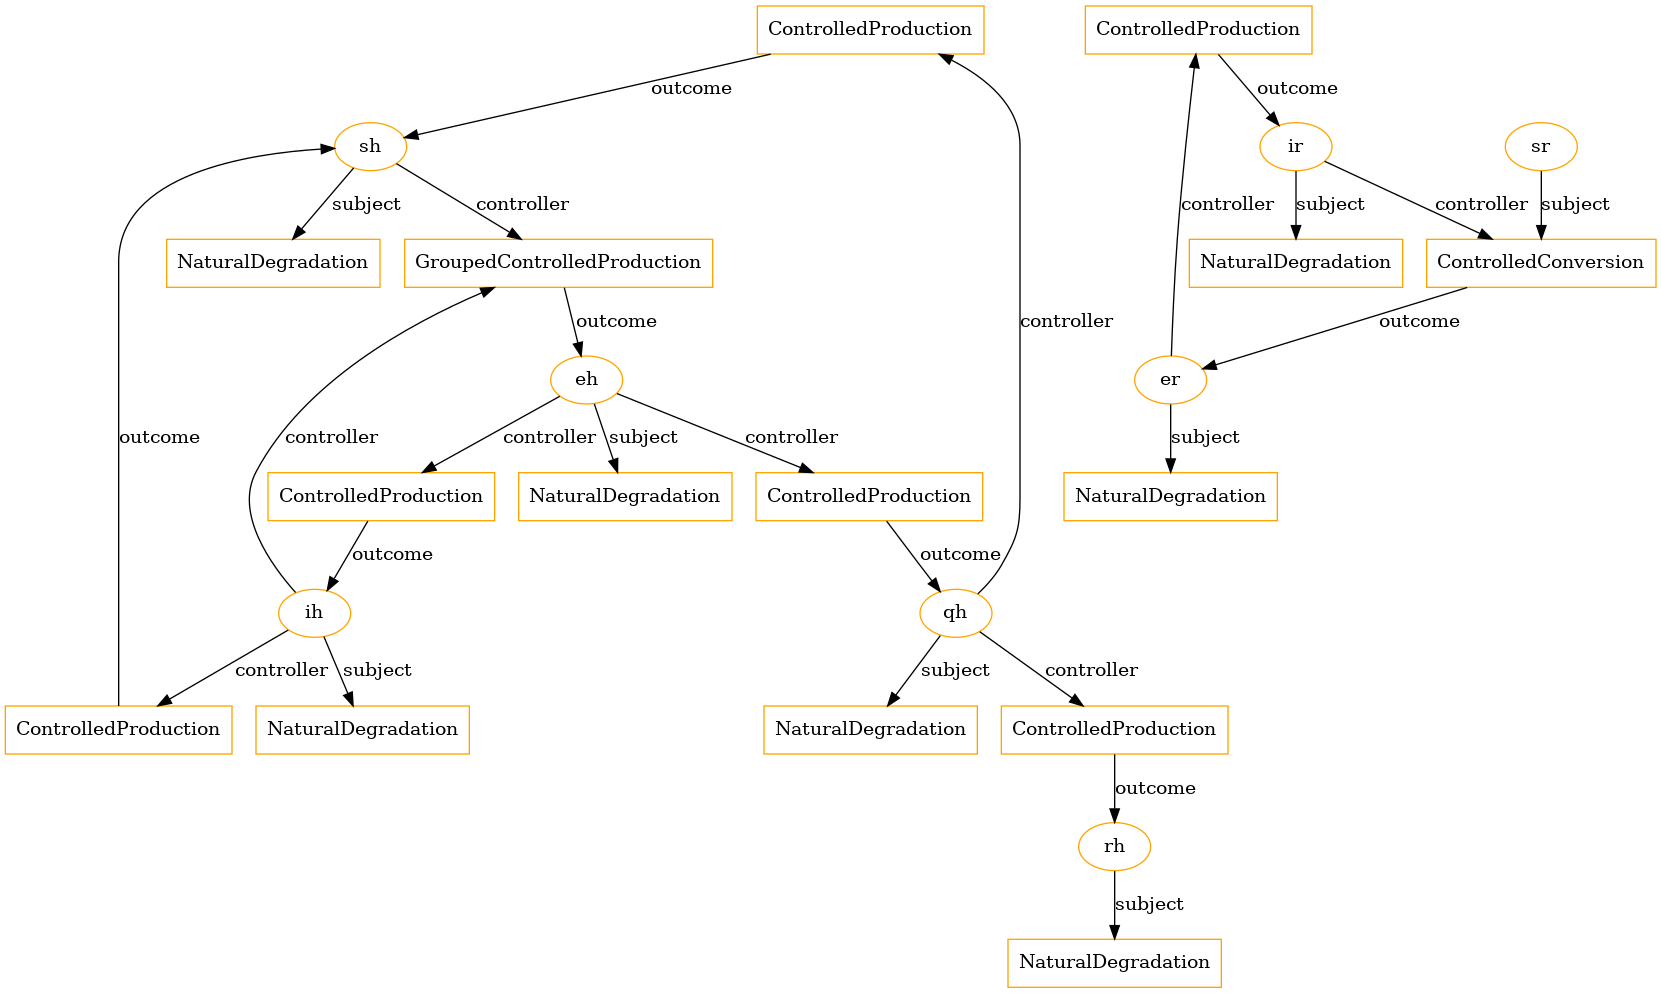

In [311]:
# Error-free tm structure
error_free_tm_2024_dec_epi1_modelB.draw_jupyter()

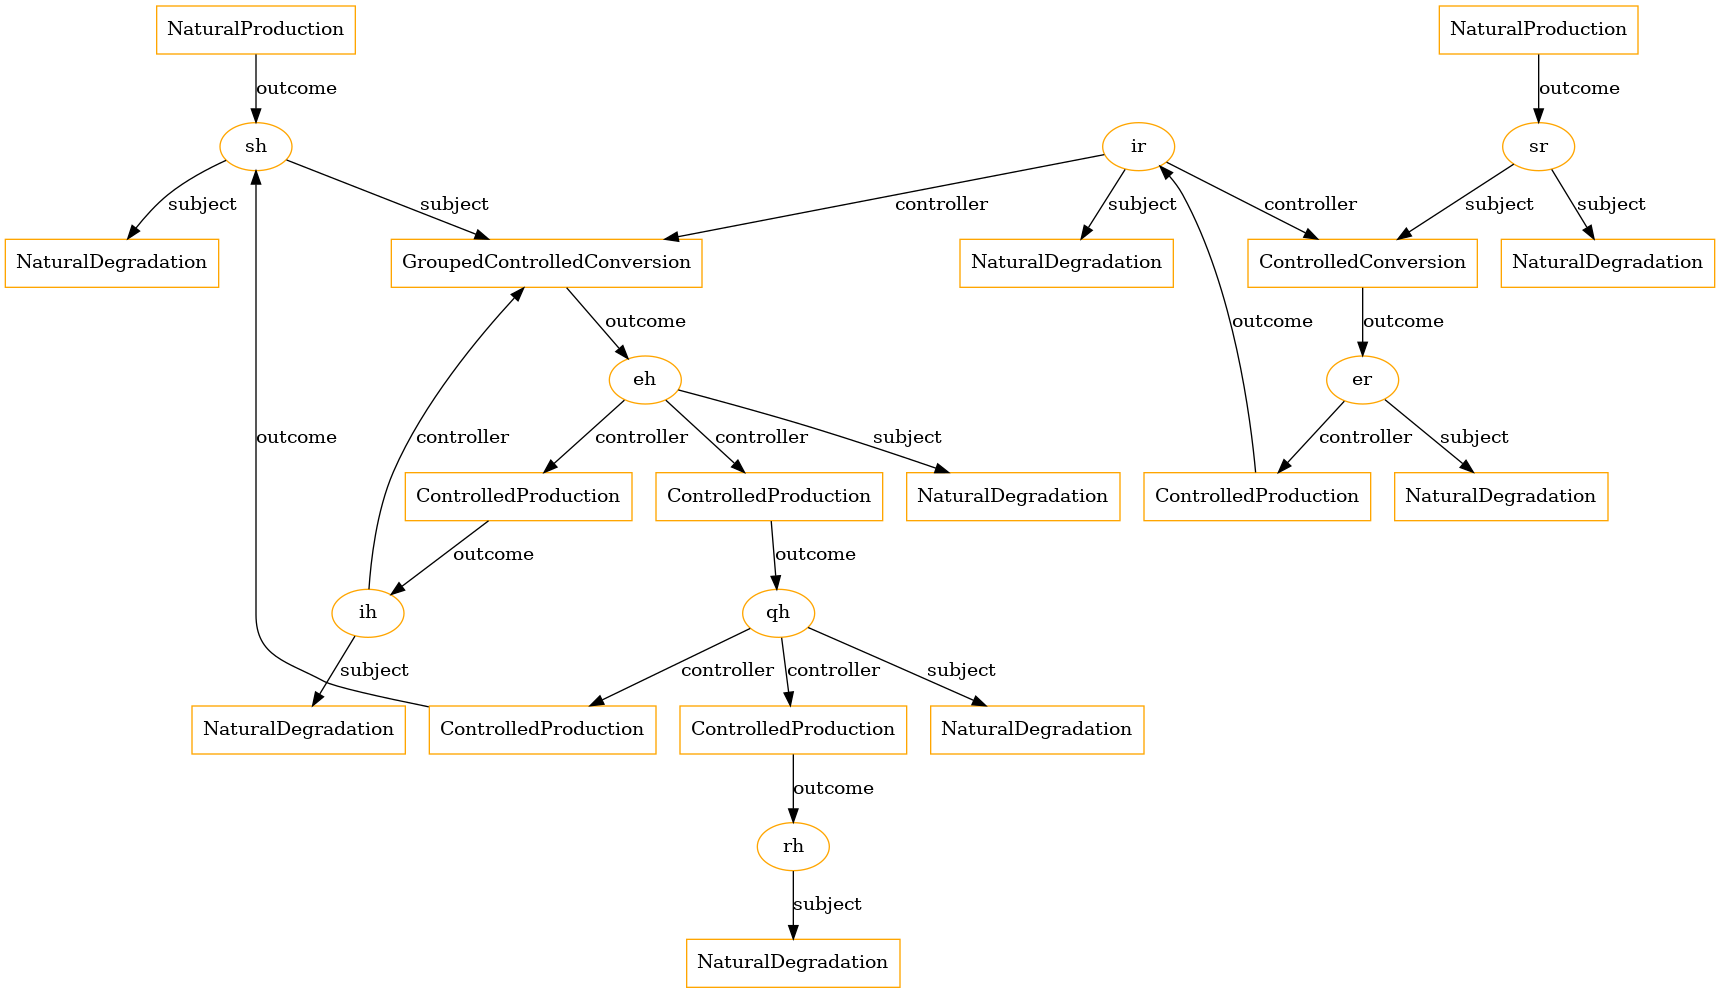

In [312]:
# Correct tm structure
correct_tm_2024_dec_epi1_modelB.draw_jupyter()

In [313]:
# December 2024 Hackathon Epi Scenario 1 Model C

# Executes straight out the box

# Structural correctness edits
# 1. Does not expand lambda terms 

original_ode_string_2024_dec_epi_1_model_C = """
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
s_m, e_m, i_m, r_m = sympy.symbols("s_m e_m i_m r_m", cls=sympy.Function)
s_w, e_w, i_w, r_w = sympy.symbols("s_w e_w i_w r_w", cls=sympy.Function)

# Define the parameters
lambda_m, alpha_m, tau_m = sympy.symbols("lambda_m alpha_m tau_m")
lambda_w, alpha_w, tau_w = sympy.symbols("lambda_w alpha_w tau_w")

odes = [
    sympy.Eq(s_m(t).diff(t), - lambda_m * s_m(t)),
    sympy.Eq(e_m(t).diff(t), lambda_m * s_m(t) - alpha_m * e_m(t)),
    sympy.Eq(i_m(t).diff(t), alpha_m * e_m(t) - tau_m * i_m(t)),
    sympy.Eq(r_m(t).diff(t), tau_m * i_m(t)),
    sympy.Eq(s_w(t).diff(t), - lambda_w * s_w(t)),
    sympy.Eq(e_w(t).diff(t), lambda_w * s_w(t) - alpha_w * e_w(t)),
    sympy.Eq(i_w(t).diff(t), alpha_w * e_w(t) - tau_w * i_w(t)),
    sympy.Eq(r_w(t).diff(t), tau_w * i_w(t))
]
"""

error_free_tm_2024_dec_epi1_modelC = execute_template_model_from_sympy_odes(
    ode_str=original_ode_string_2024_dec_epi_1_model_C,
    attempt_grounding=False,
    client=client,
)

correct_ode_string_2024_dec_epi_1_model_C = """
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
s_m, e_m, i_m, r_m = sympy.symbols("s_m e_m i_m r_m", cls=sympy.Function)
s_w, e_w, i_w, r_w = sympy.symbols("s_w e_w i_w r_w", cls=sympy.Function)

# Define the parameters
lambda_m, alpha_m, alpha_1, tau_m, beta_mm, beta_mw, N_m  = sympy.symbols("lambda_m alpha_m alpha_1 tau_m beta_mm beta_mw N_m")
lambda_w, alpha_w, alpha_2, alpha_3, tau_w, beta_ww, beta_wm, N_w  = sympy.symbols("lambda_w alpha_w alpha_2 alpha_3 tau_w beta_ww beta_wm N_w")

lambda_m = (beta_mm * i_m(t) / N_m) + (alpha_1 * beta_wm * i_w(t) / N_m)
lambda_w = (alpha_2 * beta_mw * i_m(t) / N_w) + (alpha_3 * beta_ww * i_w(t) / N_w)

odes = [
    sympy.Eq(s_m(t).diff(t), - lambda_m * s_m(t)),
    sympy.Eq(e_m(t).diff(t), lambda_m * s_m(t) - alpha_m * e_m(t)),
    sympy.Eq(i_m(t).diff(t), alpha_m * e_m(t) - tau_m * i_m(t)),
    sympy.Eq(r_m(t).diff(t), tau_m * i_m(t)),
    sympy.Eq(s_w(t).diff(t), - lambda_w * s_w(t)),
    sympy.Eq(e_w(t).diff(t), lambda_w * s_w(t) - alpha_w * e_w(t)),
    sympy.Eq(i_w(t).diff(t), alpha_w * e_w(t) - tau_w * i_w(t)),
    sympy.Eq(r_w(t).diff(t), tau_w * i_w(t))
]
"""

correct_tm_2024_dec_epi1_modelC = execute_template_model_from_sympy_odes(
    ode_str=correct_ode_string_2024_dec_epi_1_model_C,
    attempt_grounding=False,
    client=client,
)

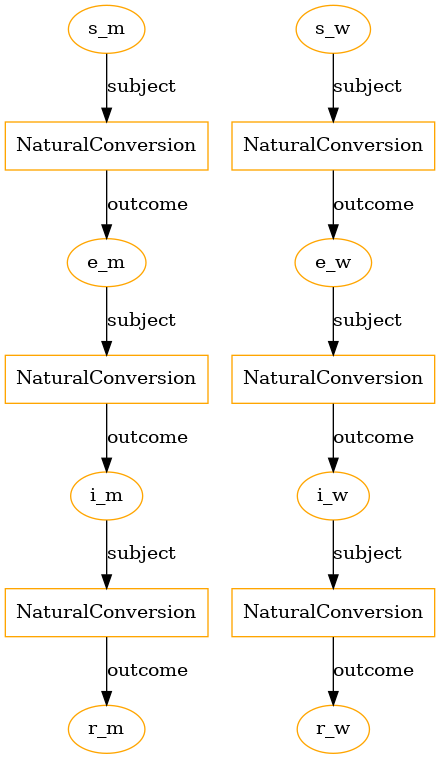

In [314]:
error_free_tm_2024_dec_epi1_modelC.draw_jupyter()

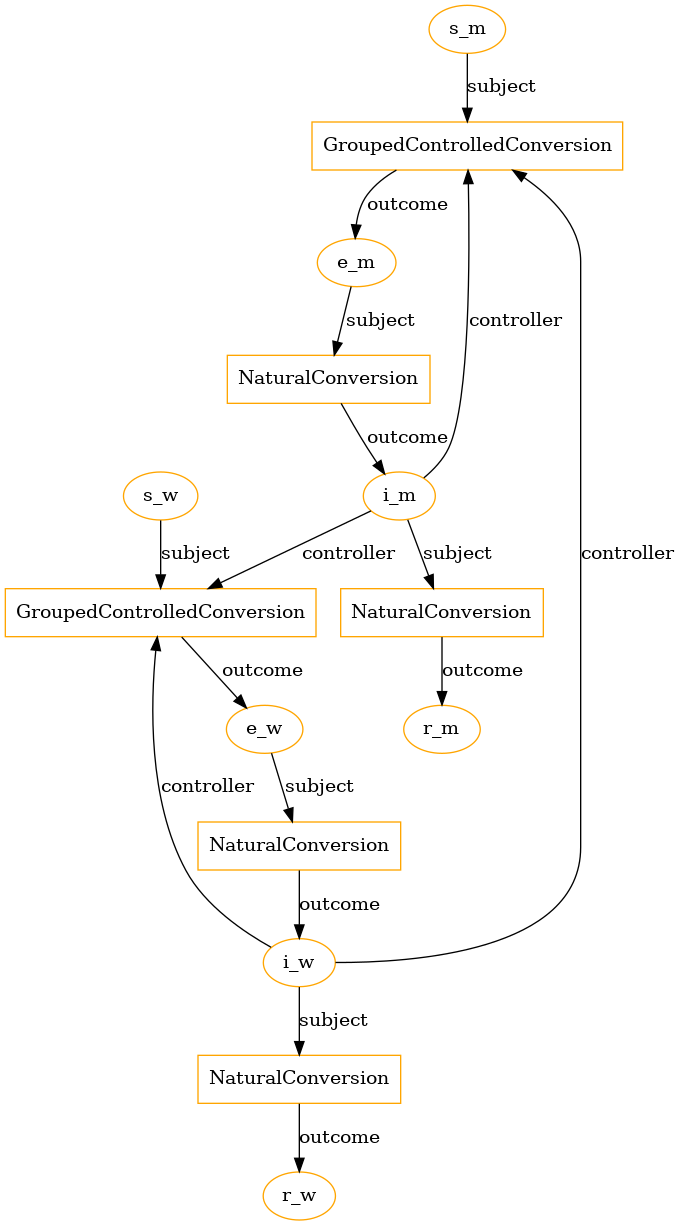

In [315]:
correct_tm_2024_dec_epi1_modelC.draw_jupyter()

In [325]:
# BIOMODEL 962

# Executes straight out the box 

# Structural correctness edits
# 1. Define compartments U and S as functions of time in equation for compartment U


original_ode_str_biomd_962 = """
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, U, Q, C = sympy.symbols("S U Q C", cls=sympy.Function)

# Define the parameters
a, N, gamma1, gamma2, sigma = sympy.symbols("a N gamma1 gamma2 sigma")

odes = [
    sympy.Eq(S(t).diff(t), -a * U(t) * S(t) / N),
    sympy.Eq(U(t).diff(t), a * U(0) * S(0) / N - gamma1 * U(t)),
    sympy.Eq(Q(t).diff(t), gamma1 * U(t) - (gamma2 + (1 - gamma2) * sigma) * Q(t)),
    sympy.Eq(C(t).diff(t), (gamma2 + (1 - gamma2) * sigma) * Q(t))
]
"""

error_free_tm_biomd_962 = execute_template_model_from_sympy_odes(
    ode_str=original_ode_str_biomd_962, attempt_grounding=False, client=client
)

correct_ode_str_biomd_962 = """
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, U, Q, C = sympy.symbols("S U Q C", cls=sympy.Function)

# Define the parameters
a, N, gamma1, gamma2, sigma = sympy.symbols("a N gamma1 gamma2 sigma")

odes = [
    sympy.Eq(S(t).diff(t), -a * U(t) * S(t) / N),
    sympy.Eq(U(t).diff(t), a * U(t) * S(t) / N - gamma1 * U(t)),
    sympy.Eq(Q(t).diff(t), gamma1 * U(t) - (gamma2 + (1 - gamma2) * sigma) * Q(t)),
    sympy.Eq(C(t).diff(t), (gamma2 + (1 - gamma2) * sigma) * Q(t))
]
"""


correct_tm_biomd_962 = execute_template_model_from_sympy_odes(
    ode_str=correct_ode_str_biomd_962, attempt_grounding=False, client=client
)

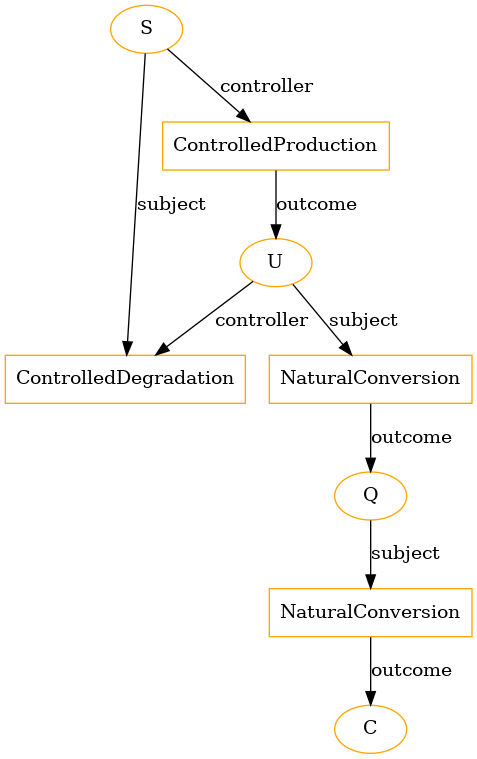

In [324]:
# error-free tm structure
error_free_tm_biomd_962.draw_jupyter()

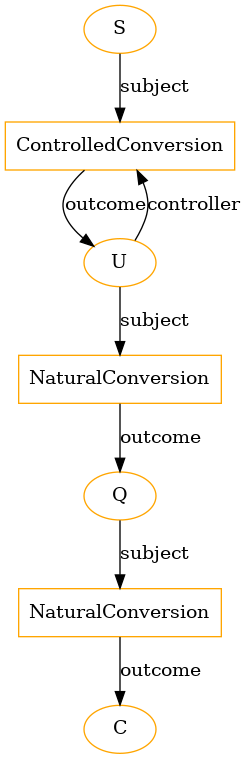

In [323]:
# correct tm structure
correct_tm_biomd_962.draw_jupyter()

In [ ]:
# Model from this paper published in nature: https://www.nature.com/articles/s41586-020-2554-8

